In [1]:
import pandas as pd
data=pd.read_excel('Data_Wordle_All_Features.xlsx',sheet_name='Data_Wordle_All_Features')
data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,w5,Vowel_fre,Consonant_fre,Speech,Same_letter_fre,w1_fre,w2_fre,w3_fre,w4_fre,w5_fre
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,...,16,1,4,7,0,0.0555,0.0552,0.0366,0.0322,0.0327
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,...,11,1,4,7,0,0.0474,0.0751,0.0856,0.0641,0.0084
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,...,5,2,3,7,2,0.0230,0.0712,0.0751,0.0230,0.1142
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,...,25,2,3,7,0,0.0023,0.0366,0.1142,0.0751,0.0200
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,...,11,1,4,12,0,0.0313,0.0751,0.0794,0.0641,0.0084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,2023-04-21,671,kayak,17171,1768,0,2,13,37,33,...,11,2,3,7,4,0.0084,0.0856,0.0200,0.0856,0.0084
468,2023-04-22,672,broke,18527,1840,1,9,24,29,23,...,5,2,3,13,0,0.0212,0.0751,0.0712,0.0084,0.1142
469,2023-04-23,673,unzip,16915,1720,0,2,15,34,31,...,16,2,3,3,0,0.0366,0.0641,0.0024,0.0794,0.0327
470,2023-04-24,674,ditto,18104,1815,0,4,24,41,24,...,15,2,3,7,2,0.0313,0.0794,0.0746,0.0746,0.0712


In [2]:
features = ['Contest number','Number of reported results','Number in hard mode','w1','w2','w3','w4','w5','w1_fre','w2_fre','w3_fre','w4_fre','w5_fre','Vowel_fre','Consonant_fre','Speech','Same_letter_fre']
label = ['1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)']

Train_all = data[features+label].copy().dropna()
X = Train_all[features]

Y_1= Train_all[label[0]]
Y_2= Train_all[label[1]]
Y_3= Train_all[label[2]]
Y_4= Train_all[label[3]]
Y_5= Train_all[label[4]]
Y_6= Train_all[label[5]]
Y_7= Train_all[label[6]]

In [3]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
def linear(X,y,i):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=20222023)
    reg=LinearRegression()
    reg.fit(X_train,y_train)
    pre_all=reg.predict(X)
    mae = mean_absolute_error(data[label[i-1]], pre_all)
    mse = mean_squared_error(data[label[i-1]], pre_all)
    rmse = mse**(1/2)
    r2=r2_score(data[label[i-1]], pre_all)
    print(f'线性回归：尝试{i}次，RMSE：{rmse}；MSE：{mse}；MAE：{mae}；r2：{r2}')


def xgboost(X,y,i):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=20222023)
    reg=XGBRegressor()
    reg.fit(X_train,y_train)
    pre_all=reg.predict(X)
    mae = mean_absolute_error(data[label[i-1]], pre_all)
    mse = mean_squared_error(data[label[i-1]], pre_all)
    rmse = mse**(1/2)
    r2=r2_score(data[label[i-1]], pre_all)
    print(f'XGB：尝试{i}次，RMSE：{rmse}；MSE：{mse}；MAE：{mae}；r2：{r2}')


def rf(X,y,i):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=20222023)
    reg=RandomForestRegressor()
    reg.fit(X_train,y_train)
    pre_all=reg.predict(X)
    mae = mean_absolute_error(data[label[i-1]], pre_all)
    mse = mean_squared_error(data[label[i-1]], pre_all)
    rmse = mse**(1/2)
    r2=r2_score(data[label[i-1]], pre_all)
    print(f'RF：尝试{i}次，RMSE：{rmse}；MSE：{mse}；MAE：{mae}；r2：{r2}')


def lgbm(X,y,i):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=20222023)
    reg=LGBMRegressor(objective='regression', num_leaves=31, learning_rate=0.05, n_estimators=20)
    reg.fit(X_train,y_train)
    pre_all=reg.predict(X)
    mae = mean_absolute_error(data[label[i-1]], pre_all)
    mse = mean_squared_error(data[label[i-1]], pre_all)
    rmse = mse**(1/2)
    r2=r2_score(data[label[i-1]], pre_all)
    print(f'LGBM：尝试{i}次，RMSE：{rmse}；MSE：{mse}；MAE：{mae}；r2：{r2}')

In [5]:
linear(X,Y_1,1)
linear(X,Y_2,2)
linear(X,Y_3,3)
linear(X,Y_4,4)
linear(X,Y_5,5)
linear(X,Y_6,6)
linear(X,Y_7,7)

xgboost(X,Y_1,1)
xgboost(X,Y_2,2)
xgboost(X,Y_3,3)
xgboost(X,Y_4,4)
xgboost(X,Y_5,5)
xgboost(X,Y_6,6)
xgboost(X,Y_7,7)

rf(X,Y_1,1)
rf(X,Y_2,2)
rf(X,Y_3,3)
rf(X,Y_4,4)
rf(X,Y_5,5)
rf(X,Y_6,6)
rf(X,Y_7,7)

lgbm(X,Y_1,1)
lgbm(X,Y_2,2)
lgbm(X,Y_3,3)
lgbm(X,Y_4,4)
lgbm(X,Y_5,5)
lgbm(X,Y_6,6)
lgbm(X,Y_7,7)

线性回归：尝试1次，RMSE：0.6536287690286899；MSE：0.42723056770196055；MAE：0.4182037563880419；r2：0.22576861923037717
线性回归：尝试2次，RMSE：3.22319366003395；MSE：10.38897737008305；MAE：2.3802319983876945；r2：0.37290889941374405
线性回归：尝试3次，RMSE：5.998544559529977；MSE：35.98253683266669；MAE：4.868919998520883；r2：0.40753092608473707
线性回归：尝试4次，RMSE：4.924027749117709；MSE：24.246049274081212；MAE：3.8189478706325963；r2：0.14744375239382945
线性回归：尝试5次，RMSE：4.653611440805226；MSE：21.656099441993288；MAE：3.7722244895792687；r2：0.3943693450863881
线性回归：尝试6次，RMSE：5.049348120382058；MSE：25.49591644080583；MAE：3.993679766410668；r2：0.29202505841662385
线性回归：尝试7次，RMSE：3.724380472133031；MSE：13.871009901205857；MAE：2.1372924299644134；r2：0.11720772699711413
XGB：尝试1次，RMSE：0.3082685133777632；MSE：0.09502947634013617；MAE：0.057336097031377334；r2：0.8277866607804051
XGB：尝试2次，RMSE：0.8075028706799255；MSE：0.6520608861563206；MAE：0.21100060671461368；r2：0.9606408249644933
XGB：尝试3次，RMSE：1.875193559728571；MSE：3.5163508864475097；MAE：0.5037671671075336；r2：0.94

In [6]:
eerie=pd.read_excel('EERIE.xlsx',sheet_name='Sheet1')
eerie

,Date,Contest number,Word,Number of reported results,Number in hard mode,w1,w2,w3,w4,w5,Vowel_fre,Consonant_fre,Speech,Same_letter_fre,w1_fre,w2_fre,w3_fre,w4_fre,w5_fre
0,2023-05-15,695,eerie,18334,1874,e,e,r,i,e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import nltk

letter = [str(chr(i)) for i in range(ord('a'),ord('z')+1)]
Vowel = ['a','e','i','o','u']
Consonant = list(set(letter).difference(set(Vowel)))


def count_vowel(s):
    c = 0
    for i in range(len(s)):
        if s[i] in Vowel:
            c+=1
    return c


def count_consonant(s):
    c = 0
    for i in range(len(s)):
        if s[i] in Consonant:
            c+=1
    return c


def count_same_letter(s):
    d={}
    for char in set(s):
        d[char]=s.count(char)

    sum = 0
    for i in d:
        if d[i]>1:
            sum = sum + d[i]

    return sum


eerie['Vowel_fre'] = eerie['Word'].apply(lambda x:count_vowel(x))
eerie['Consonant_fre'] = eerie['Word'].apply(lambda x:count_consonant(x))

pos_tags = nltk.pos_tag(list(eerie['Word']))
eerie['Speech']=pd.DataFrame(pos_tags)[1]
eerie.replace({'Speech':{'NN':7}},inplace=True)

eerie['Same_letter_fre'] = eerie['Word'].apply(lambda x:count_same_letter(x))

letter_map = dict(zip(letter,range(1,27)))
eerie['w1'] = eerie['w1'].map(letter_map)
eerie['w2'] = eerie['w2'].map(letter_map)
eerie['w3'] = eerie['w3'].map(letter_map)
eerie['w4'] = eerie['w4'].map(letter_map)
eerie['w5'] = eerie['w5'].map(letter_map)

Frequency=pd.read_excel("Letter_Frequency.xlsx",sheet_name="Sheet1")
Frequency_map=dict(zip(Frequency['N'],Frequency['Frequency']))
eerie['w1_fre']=eerie['w1']
eerie['w2_fre']=eerie['w2']
eerie['w3_fre']=eerie['w3']
eerie['w4_fre']=eerie['w4']
eerie['w5_fre']=eerie['w5']
eerie.replace({'w1_fre':Frequency_map,'w2_fre':Frequency_map,'w3_fre':Frequency_map,'w4_fre':Frequency_map,'w5_fre':Frequency_map},inplace=True)

eerie

,Date,Contest number,Word,Number of reported results,Number in hard mode,w1,w2,w3,w4,w5,Vowel_fre,Consonant_fre,Speech,Same_letter_fre,w1_fre,w2_fre,w3_fre,w4_fre,w5_fre
0,2023-05-15,695,eerie,18334,1874,5,5,18,9,5,4,1,7,3,0.1142,0.1142,0.0751,0.0794,0.1142


In [8]:
features = ['Contest number','Number of reported results','Number in hard mode','w1','w2','w3','w4','w5','w1_fre','w2_fre','w3_fre','w4_fre','w5_fre','Vowel_fre','Consonant_fre','Speech','Same_letter_fre']
label = ['1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)']
Train_all = data[features+label].copy().dropna()
X = Train_all[features]

Y_1=Train_all[label[0]]
Y_2=Train_all[label[1]]
Y_3=Train_all[label[2]]
Y_4=Train_all[label[3]]
Y_5=Train_all[label[4]]
Y_6=Train_all[label[5]]
Y_7=Train_all[label[6]]

reg1 = XGBRegressor(random_state=20222023).fit(X, Y_1)
reg2 = XGBRegressor(random_state=20222023).fit(X, Y_2)
reg3 = XGBRegressor(random_state=20222023).fit(X, Y_3)
reg4 = XGBRegressor(random_state=20222023).fit(X, Y_4)
reg5 = XGBRegressor(random_state=20222023).fit(X, Y_5)
reg6 = XGBRegressor(random_state=20222023).fit(X, Y_6)
reg7 = XGBRegressor(random_state=20222023).fit(X, Y_7)

X_pred=eerie[features]
p_pred1 = reg1.predict(X_pred)
p_pred2 = reg2.predict(X_pred)
p_pred3 = reg3.predict(X_pred)
p_pred4 = reg4.predict(X_pred)
p_pred5 = reg5.predict(X_pred)
p_pred6 = reg6.predict(X_pred)
p_pred7 = reg7.predict(X_pred)

print(p_pred1,p_pred2,p_pred3,p_pred4,p_pred5,p_pred6,p_pred7)

[0.13342576] [4.917744] [15.3803425] [21.728819] [28.951614] [16.292498] [2.3451428]


In [9]:
features = ['Contest number','Number of reported results','Number in hard mode','w1','w2','w3','w4','w5','w1_fre','w2_fre','w3_fre','w4_fre','w5_fre','Vowel_fre','Consonant_fre','Speech','Same_letter_fre']
label = ['1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)']
Train_all = data[features+label].copy().dropna()
X = Train_all[features]

Y_1= Train_all[label[0]]
Y_2= Train_all[label[1]]
Y_3= Train_all[label[2]]
Y_4= Train_all[label[3]]
Y_5= Train_all[label[4]]
Y_6= Train_all[label[5]]
Y_7= Train_all[label[6]]

reg1 = RandomForestRegressor(random_state=202305).fit(X, Y_1)
reg2 = RandomForestRegressor(random_state=202305).fit(X, Y_2)
reg3 = RandomForestRegressor(random_state=202305).fit(X, Y_3)
reg4 = RandomForestRegressor(random_state=202305).fit(X, Y_4)
reg5 = RandomForestRegressor(random_state=202305).fit(X, Y_5)
reg6 = RandomForestRegressor(random_state=202305).fit(X, Y_6)
reg7 = RandomForestRegressor(random_state=202305).fit(X, Y_7)

X_pred=eerie[features]
p_pred1 = reg1.predict(X_pred)
p_pred2 = reg2.predict(X_pred)
p_pred3 = reg3.predict(X_pred)
p_pred4 = reg4.predict(X_pred)
p_pred5 = reg5.predict(X_pred)
p_pred6 = reg6.predict(X_pred)
p_pred7 = reg7.predict(X_pred)
print(p_pred1,p_pred2,p_pred3,p_pred4,p_pred5,p_pred6,p_pred7)

[0.17] [4.73] [16.24] [30.72] [27.86] [14.03] [6.08]


<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

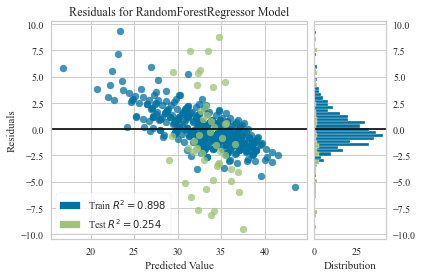

In [10]:
from yellowbrick.regressor import ResidualsPlot
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X,Y_4, test_size=0.1, random_state=20222023)
model = ResidualsPlot(RandomForestRegressor(random_state=202305))
model.fit(Xt_train, yt_train)
model.score(Xt_test, yt_test)
model.poof(outpath="figures\\预测残差图-4.pdf")